Part 1: Prepare the Data

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

In [2]:
# Loading data
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
new_df = df.drop(["MYOPIC"], axis='columns')
new_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

Part 2: Apply Dimensionality Reduction

In [11]:
from sklearn.decomposition import PCA
# Initialize PCA model
pca = PCA(n_components=.90)

# Get the principal components for the X_train_scaled
myopic_pca = pca.fit_transform(scaled_data)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [12]:
# Get the shape of features after reduction
myopic_pca.shape

(618, 10)

In [17]:
df2 = df.drop(['MYOPIC'], axis=1)
labels = df['MYOPIC']

In [18]:
from sklearn.manifold import TSNE
#Initialize the t-SNE model
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
#Reduce dimensions
tsne_features = tsne.fit_transform(myopic_pca)

/Users/jenm/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.003s...
[t-SNE] Computed neighbors for 618 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.095505
[t-SNE] KL divergence after 2500 iterations: 1.931603


In [19]:
# The dataset has 2 columns
tsne_features.shape

(618, 3)

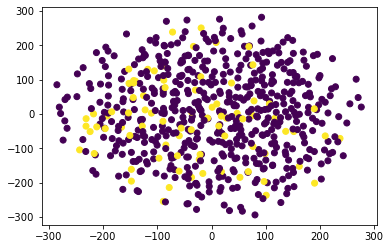

In [22]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)


Part 3: Perform a Cluster Analysus with K-means

In [23]:
#Create an elbow plot to identify the best number of clusters. Make sure to do the following:

# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

In [25]:
# Calculate the inertia for the range of k values
from sklearn.cluster import KMeans
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopic_pca)
    inertia.append(km.inertia_)

In [29]:
#If possible, determine where the elbow of the plot is, and at which value of k it appears.
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418
9,10,4483.539918


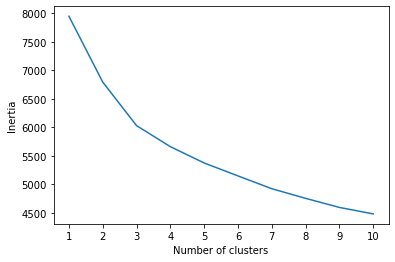

In [28]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



My recommendation is to use a bigger dataset and to split the data into Test and Training to test the above models and others to be able to make more accurate predictions and clustering.